In [1]:
print("Lecture-22")

Lecture-22


## Keras'ta Evrişimsel Sinir Ağlarının Oluşturulması

Evrişim işleminde yalnızca filtre matrislerinin boyutunu, sayısını, padding yapılıp yapılmayacağını ve stride değerini belirtmektedir. Keras'ta evrişim işlemi tek boyutlu, iki boyutlu ya da 3 boyutlu olarak da yapılabilmektedir. Resimler için en uygun evrişim iki boyutlu olandır. Biz burada iki boyutlu evrişlim işlemi üzerinde çalışacağız.



Keras'ta iki boyutlu evrişim işlemleri için Conv2D sınıf kullanılmaktadır. Dense sınıfında olduğu gibi Conv2D sınıfı türünden nesneler yaratarak modele ekleyeceğiz. 

tf.keras.layers.Conv2D(
 filters,
 kernel_size,
 strides=(1, 1),
 padding='valid', ('same')
 data_format=None,
 dilation_rate=(1, 1),
 groups=1,
 activation=None,
 use_bias=True,
 kernel_initializer='glorot_uniform',
 bias_initializer='zeros',
 kernel_regularizer=None,
 bias_regularizer=None,
 activity_regularizer=None,
 kernel_constraint=None,
 bias_constraint=None,
 **kwargs
) 

input_shape = (28, 28, 1).

Conv2D katmanından elde edilen çıktı üç boyutludur. Bu nedenle iki Conv2D katmanı birbirine bağlanabilmektedir. Conv2D katmanının çıktısındaki üçüncü boyut filtre sayısını belirtir. Ancak bu çıktı sonraki Conv2D katmanına adeta bir kanal sayısı gibi verilmektedir. Dense katmanlarının tek boyultu girdi beklediğini biliyoruz. Bu nedenle Conv2D katmanının çıktısı Dense katmana bağlanacaksa üç boyultu çıktının tek boyuta indirgenmesi gerekir. 

tf.keras.layers.Flatten(data_format=None, **kwargs)

Conv2D --> kullanılacak matris 2 boyutlu (kernel_height, kernel_width)
Conv3D --> kullanılacak matris 3 boyutlu (kernel_height, kernel_width, kernel_depth)

In [20]:
EPOCHS = 20

import pandas as pd

df_training = pd.read_csv("mnist/mnist_train.csv")
df_test = pd.read_csv("mnist/mnist_test.csv")

training_dataset_x = df_training.iloc[:, 1:].to_numpy()
training_dataset_y = df_training.iloc[:, 0].to_numpy()

print(training_dataset_x.shape)
print(training_dataset_y.shape)

test_dataset_x = df_test.iloc[:, 1:].to_numpy()
test_dataset_y = df_test.iloc[:, 0].to_numpy()

print(test_dataset_x.shape)
print(test_dataset_y.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [22]:
# (60000, 28, 28, 1) ve (1000, 28, 28, 1) --> Çünkü Conv2D katmanı üç boyutluı resim matrislerini girdi olarak istemektedir.

training_dataset_x = training_dataset_x / 255
test_dataset_x = test_dataset_x / 255

training_dataset_x = training_dataset_x.reshape(-1, 28, 28, 1)
test_dataset_x = test_dataset_x.reshape(-1, 28, 28, 1)

In [4]:
from tensorflow.keras.utils import to_categorical

ohe_training_dataset_y = to_categorical(training_dataset_y)
ohe_test_dataset_y = to_categorical(test_dataset_y)

In [6]:
training_dataset_y

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [7]:
ohe_training_dataset_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [8]:
ohe_training_dataset_y.shape

(60000, 10)

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

model = Sequential(name='MNIST-CNN')
model.add(Conv2D(16, (3, 3), input_shape = (28, 28, 1), activation='relu', name = 'Conv2D-1'))
model.add(Conv2D(32, (3, 3), name = 'Conv2D-2', activation='relu'))
model.add(Flatten(name='Flatten'))
model.add(Dense(64, activation='relu', name = 'Hidden-1'))
model.add(Dense(32, activation='relu', name = 'Hidden-2'))
model.add(Dense(10, activation='softmax', name = 'Output'))

model.summary()

Model: "MNIST-CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D-1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 Conv2D-2 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 Flatten (Flatten)           (None, 18432)             0         
                                                                 
 Hidden-1 (Dense)            (None, 64)                1179712   
                                                                 
 Hidden-2 (Dense)            (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 10)                330       
                                                                 
Total params: 1,186,922
Trainable params: 1,186,922
Non-t

In [14]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

hist = model.fit(training_dataset_x, ohe_training_dataset_y, epochs=EPOCHS, batch_size=32, validation_split = 0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/20
1500/1500 [==============================] - 84s 56ms/step - loss: 0.0901 - categorical_accuracy: 0.9724 - val_loss: 0.0622 - val_categorical_accuracy: 0.9828
Epoch 2/20
1500/1500 [==============================] - 85s 57ms/step - loss: 0.0486 - categorical_accuracy: 0.9857 - val_loss: 0.0519 - val_categorical_accuracy: 0.9866
Epoch 3/20
1500/1500 [==============================] - 100s 67ms/step - loss: 0.0337 - categorical_accuracy: 0.9902 - val_loss: 0.0539 - val_categorical_accuracy: 0.9843
Epoch 4/20
1500/1500 [==============================] - 83s 55ms/step - loss: 0.0248 - categorical_accuracy: 0.9931 - val_loss: 0.0530 - val_categorical_accuracy: 0.9874
Epoch 5/20
1500/1500 [==============================] - 76s 51ms/step - loss: 0.0188 - categorical_accuracy: 0.9944 - val_loss: 0.0594 - val_categorical_accuracy: 0.9869
Epoch 6/20
1500/1500 [==============================] - 80s 53ms/step - loss: 0.0130 - categorical_accuracy: 0.9964 - val_loss: 0.0684 - val_categori

NameError: name 'EPOCHS' is not defined

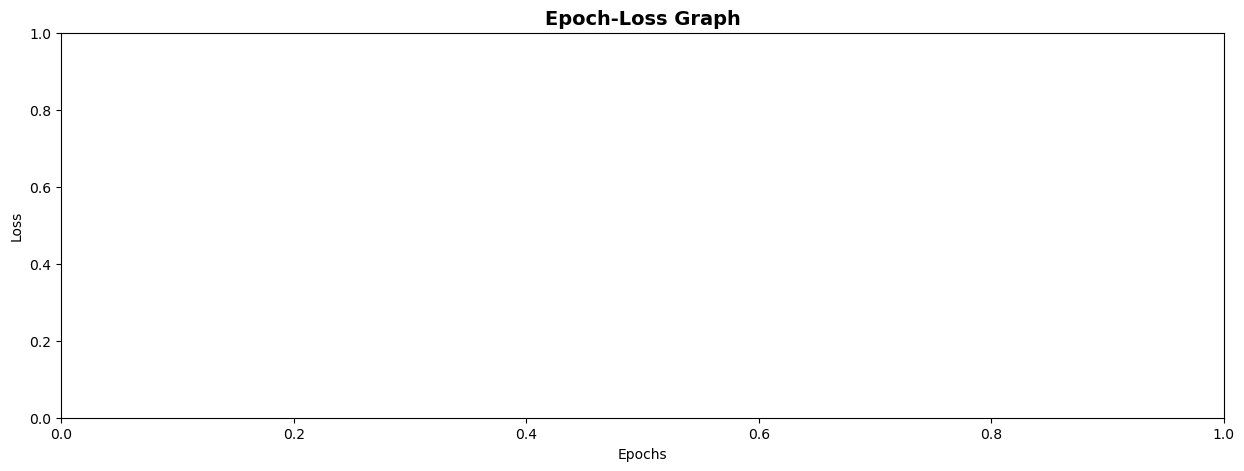

In [ ]:
# kernel died.

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.title('Epoch-Loss Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, EPOCHS + 1))

plt.plot(range(1, EPOCHS + 1), hist.history['loss'])
plt.plot(range(1, EPOCHS + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

plt.figure(figsize=(15, 5))
plt.title('Categorical Accuracy - Epoch Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Categorical Accuracy')
plt.xticks(range(1, EPOCHS + 1))

plt.plot(range(1, EPOCHS + 1), hist.history['categorical_accuracy'])
plt.plot(range(1, EPOCHS + 1), hist.history['val_categorical_accuracy'])
plt.legend(['Categorical Accuracy', 'Validation Categorical Accuracy'])
plt.show()

In [ ]:
eval_result = model.evaluate(test_dataset_x, ohe_test_dataset_y)
for i in range(len(eval_result)):
    print(f'{model.metrics_names[i]} --> {eval_result[i]}')

## Evrişimsel Sinir Ağlarında Nöron Sayıları Nasıl Azaltılabilir? (Downsampling)

Genel olarak bir sinir ağı modellerinde çok sayıda nöron bulunmasının dezavantajları bulunur:
- Modelin eğitilmesi fazla zaman alır.
- Model verilerinni saklanması sırasında daha fazla disk alanına gereksinim duyulur. 
- Modeldeki parametre sayılarının artması overfitting olgusuna yol açabilmekte.

Nöron sayılarınnı azaltılması için akla gelebilecek ilk yöntem stride değerinin yükseltilmesidir. Örnekte stride değerini 1 aldık. Evrişmi işlemlerindfe model parametrelerini azaltmak için "pooling" denilen daha etkin bir yöntem de geliştirilmiştir. Pooling yöntemi genellikle 2x2 bir matrisle ve 2'li bir stride değeri ile uygulanmaktadır. 

Pooling işleme iki temel yöntemle yapılmaktadır. Max-Pooling, Average-Pooling. 
Max-Pooling: Bu yöntemde matrisin pooling vüyüklüğü kadarki bölgünde bulunan en büyük eleman elde edilir ve bu bölgedeki tüm değerler bu en büyuk elemanle temsil edilir.
Average-Pooling: Ortalama değer ile temsil edilmektedir.

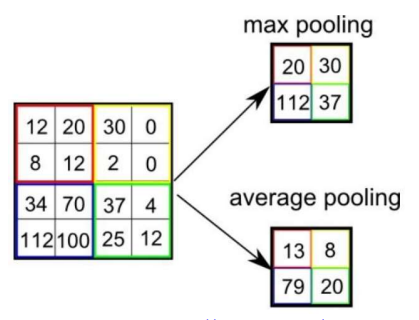

tf.keras.layers.MaxPool2D(
 pool_size=(2, 2),
 strides=None,
 padding='valid',
 data_format=None,
 **kwargs
)
tf.keras.layers.AveragePooling2D(
 pool_size=(2, 2),
 strides=None,
 padding='valid',
 data_format=None,
 **kwargs
) 

| Evrişim Katmanları --> Pooling Katmanı | .... | Evrişim Katmanları --> Pooling Katmanı | --> Flatten Katmanı --> Dense Katmanı --> Dense Katmanı --> .... --> 

Peki 2x2'lpik stride değeri 2 olan bir pooling katmanı eğitilebilir parametrelerin sayısını ne kadar düşürecektir?

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

model = Sequential(name='MNIST-CNN')
model.add(Conv2D(16, (3, 3), input_shape = (28, 28, 1), activation='relu', name = 'Conv2D-1'))
model.add(MaxPooling2D(name='Pooling-1'))
model.add(Conv2D(32, (3, 3), name = 'Conv2D-2', activation='relu'))
model.add(MaxPooling2D(name='Pooling-2'))
model.add(Flatten(name='Flatten'))
model.add(Dense(64, activation='relu', name = 'Hidden-1'))
model.add(Dense(32, activation='relu', name = 'Hidden-2'))
model.add(Dense(10, activation='softmax', name = 'Output'))

model.summary()

Model: "MNIST-CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D-1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 Pooling-1 (MaxPooling2D)    (None, 13, 13, 16)        0         
                                                                 
 Conv2D-2 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 Pooling-2 (MaxPooling2D)    (None, 5, 5, 32)          0         
                                                                 
 Flatten (Flatten)           (None, 800)               0         
                                                                 
 Hidden-1 (Dense)            (None, 64)                51264     
                                                                 
 Hidden-2 (Dense)            (None, 32)                20

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

hist = model.fit(training_dataset_x, ohe_training_dataset_y, epochs=EPOCHS, batch_size=32, validation_split = 0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/20
1500/1500 [==============================] - 17s 10ms/step - loss: 0.2177 - categorical_accuracy: 0.9339 - val_loss: 0.0869 - val_categorical_accuracy: 0.9747
Epoch 2/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0654 - categorical_accuracy: 0.9800 - val_loss: 0.0649 - val_categorical_accuracy: 0.9815
Epoch 3/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0452 - categorical_accuracy: 0.9862 - val_loss: 0.0510 - val_categorical_accuracy: 0.9862
Epoch 4/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0365 - categorical_accuracy: 0.9888 - val_loss: 0.0438 - val_categorical_accuracy: 0.9870
Epoch 5/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0300 - categorical_accuracy: 0.9911 - val_loss: 0.0476 - val_categorical_accuracy: 0.9887
Epoch 6/20
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0243 - categorical_accuracy: 0.9926 - val_loss: 0.0537 - val_categorical_a

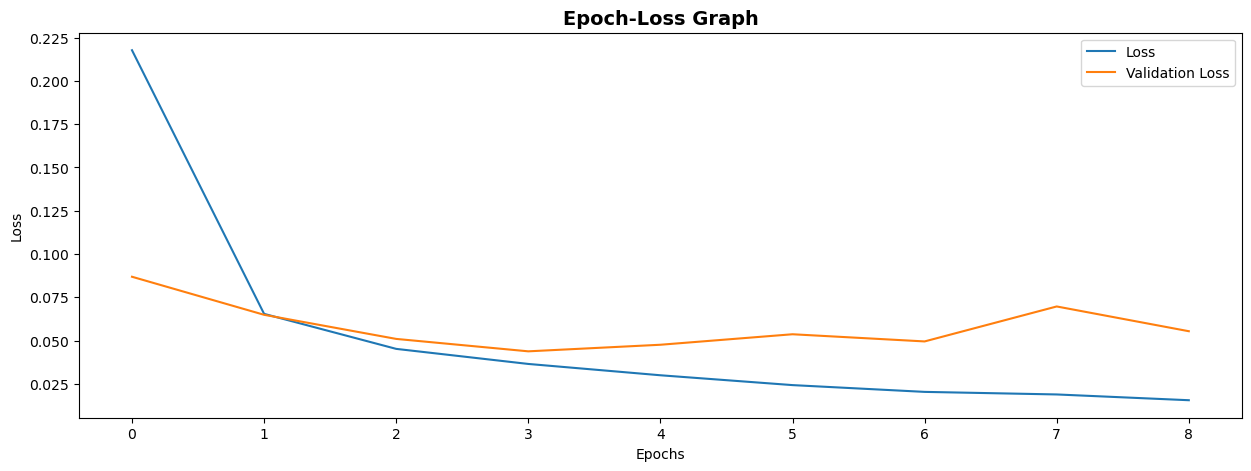

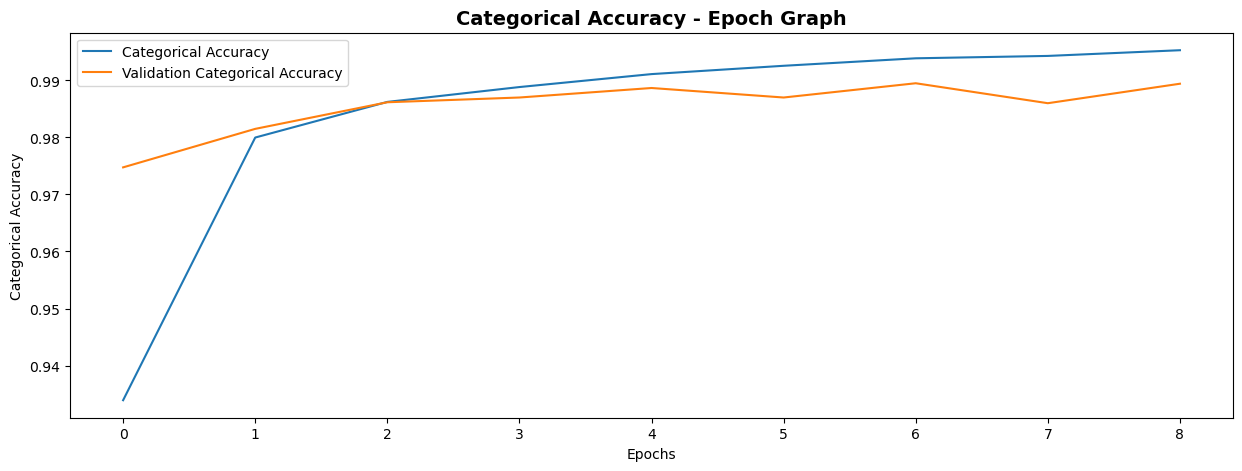

In [11]:
# kernel died.

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.title('Epoch-Loss Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(hist.epoch)

plt.plot(hist.epoch, hist.history['loss'])
plt.plot(hist.epoch, hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

plt.figure(figsize=(15, 5))
plt.title('Categorical Accuracy - Epoch Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Categorical Accuracy')
plt.xticks(hist.epoch)

plt.plot(hist.epoch, hist.history['categorical_accuracy'])
plt.plot(hist.epoch, hist.history['val_categorical_accuracy'])
plt.legend(['Categorical Accuracy', 'Validation Categorical Accuracy'])
plt.show()

In [23]:
eval_result = model.evaluate(test_dataset_x, ohe_test_dataset_y)
for i in range(len(eval_result)):
    print(f'{model.metrics_names[i]} --> {eval_result[i]}')

313/313 [==============================] - 6s 3ms/step - loss: 2.3062 - categorical_accuracy: 0.1135
loss --> 2.306154727935791
categorical_accuracy --> 0.11349999904632568


In [19]:
test_dataset_x.shape

(60000, 28, 28, 1)

In [16]:
ohe_test_dataset_y.shape

(10000, 10)

Pooling işlemleri iki boyutlu görüntü veirlerinni dışında tek boyutlu veriler üzeirnde de uygulanabilmektedir. Tabii bu durumda pooling büyüklüğü iki boyutlu bir matris yterine tek boyutlu bir değer alacaktır. 

1, 4, 6, 3, 2, 9, 4, 6, 10 ,3 

MaxPooling1D işlemini strides=2 için yaptığımızda 5 elemanlı vektör elde ederiz
4, 6, 9, 6, 10

tensorflow.keras.layers.MaxPooling1D(
 pool_size=2,
 strides=None,
 padding='valid',
 data_format='channels_last',
 **kwargs
)
tensorflow.keras.layers.AveragePooling1D(
 pool_size=2,
 strides=None,
 padding='valid',
 data_format='channels_last',
 **kwargs
) 

## Renkli resimlerin sınıflandırılması: CIFAR-10